# Visualizing the mouse behavior (modified from fig4.1)

In [2]:
import sys
sys.path.append('/Users/Sabatini Lab/GitHub/mouse_bandit/data_preprocessing_code')
sys.path.append('/Users/Sabatini Lab/GitHub/mouse_bandit')
import support_functions as sf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy as sp
import bandit_preprocessing as bp
import sys
import os
%matplotlib inline 

## load in csv files (from running exportTrials.m)

### Mouse data

In [3]:
data90 = pd.read_csv('/Users/Sabatini Lab/GitHub/mouse_bandit/data/mike_data/trial_data/all_9010_high_processed2.csv',index_col=0)
data80 = pd.read_csv('/Users/Sabatini Lab/GitHub/mouse_bandit/data/mike_data/trial_data/all_8020_high_processed2.csv',index_col=0)
#data70 = pd.read_csv('/Users/shayneufeld/GitHub/mouse_bandit/data/processed_data/full_7030_02192017.csv',index_col=0)

## Collapse into single df

In [4]:
data90['Condition'] = '90-10'
data80['Condition'] = '80-20'
#data70['Condition'] = '70-30'

datas = data90.append(data80)
#datas = datas.append(data70)

In [5]:
datas.shape

(45225, 54)

In [6]:
datas.head(15)

,Mouse ID,Session ID,Trial,Block Trial,Block Reward,Port Streak,Reward Streak,10_Port,10_Reward,10_ITI,...,1_Reward,1_ITI,1_trialDuration,0_ITI,0_trialDuration,Decision,Switch,Higher p port,Reward,Condition
0,SOM42,06142017_SOM42,11,11,7,2,-1,0,1,5.106,...,0,4.024,0.355,2.052,0.426,0,0,1,1,90-10
1,SOM42,06142017_SOM42,12,12,8,3,1,0,1,2.365,...,1,2.052,0.426,3.879,0.411,0,0,1,1,90-10
2,SOM42,06142017_SOM42,13,13,9,4,2,0,1,2.245,...,1,3.879,0.411,3.514,0.414,0,0,1,1,90-10
3,SOM42,06142017_SOM42,14,14,10,5,3,0,1,3.004,...,1,3.514,0.414,2.229,0.394,0,0,1,1,90-10
4,SOM42,06142017_SOM42,15,15,11,6,4,0,1,2.813,...,1,2.229,0.394,3.317,0.418,0,0,1,1,90-10
5,SOM42,06142017_SOM42,16,16,12,7,5,0,1,2.992,...,1,3.317,0.418,4.422,0.405,0,0,1,1,90-10
6,SOM42,06142017_SOM42,17,17,13,8,6,1,0,1.859,...,1,4.422,0.405,5.116,0.523,0,0,1,1,90-10
7,SOM42,06142017_SOM42,18,18,14,9,7,1,0,1.515,...,1,5.116,0.523,4.748,0.415,0,0,1,1,90-10
8,SOM42,06142017_SOM42,19,19,15,10,8,0,1,1.303,...,1,4.748,0.415,3.984,0.463,0,0,1,1,90-10
9,SOM42,06142017_SOM42,20,20,16,11,9,0,0,4.024,...,1,3.984,0.463,1.597,0.636,0,0,1,1,90-10


# Compare prevalance of switches following reward

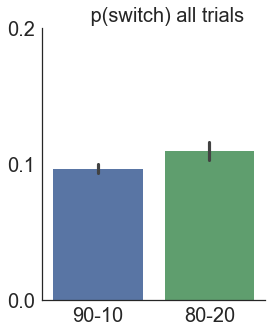

In [45]:
sns.set_style('white')
plt.figure(figsize=(4,5))
sns.barplot(x='Condition',y='Switch',data=datas,n_boot = 1000,ci=95)
plt.ylim(0,0.2)
plt.title('     p(switch) all trials',fontsize=20)
plt.xticks(fontsize=fontsize)
plt.yticks([0,0.1,0.2],fontsize=fontsize)
plt.ylabel('fraction switch trials',fontsize=fontsize)
#plt.xlabel('Condition',fontsize=15)
plt.ylabel('')
plt.xlabel('')
sns.despine()

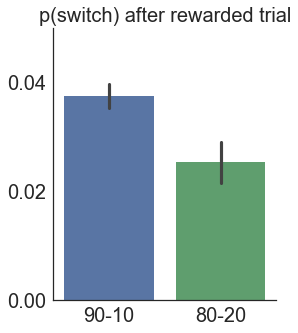

In [25]:
sns.set_style('white')
plt.figure(figsize=(4,5))
sns.barplot(x='Condition',y='Switch',data=datas[datas['1_Reward']==1],n_boot = 1000,ci=95)
plt.ylim(0,0.05)
plt.title('p(switch) after rewarded trial',fontsize=20)
plt.xticks(fontsize=fontsize)
plt.yticks([0,0.02,0.04],fontsize=fontsize)#plt.ylabel('fraction switch trials',fontsize=fontsize)
#plt.xlabel('Condition',fontsize=15)
plt.ylabel('')
plt.xlabel('')
sns.despine()

## Stats for p(switch) after unrewarded trial

In [26]:
d = datas[((datas['Condition']=='90-10') & (datas['1_Reward']==0))]
u9 = d['Switch'].mean()
s9 = d['Switch'].std() / np.sqrt(d.shape[0])

d = datas[((datas['Condition']=='80-20') & (datas['1_Reward']==0))]
u8 = d['Switch'].mean()
s8 = d['Switch'].std() / np.sqrt(d.shape[0])

#d = datas[((datas['Condition']=='70-30') & (datas['1_Reward']==0))]
#u7 = d['Switch'].mean()
#s7 = d['Switch'].std() / np.sqrt(d.shape[0]) 

print('90-10: %.03f pm %.03f' % (u9,s9))
print('80-20: %.03f pm %.03f' % (u8,s8))
#print('70-30: %.03f pm %.03f' % (u7,s7))

90-10: 0.302 pm 0.005
80-20: 0.292 pm 0.009


## Stats for p(switch) after rewarded trial

In [27]:
d = datas[((datas['Condition']=='90-10') & (datas['1_Reward']==1))]
u9 = d['Switch'].mean()
s9 = d['Switch'].std() / np.sqrt(d.shape[0])

d = datas[((datas['Condition']=='80-20') & (datas['1_Reward']==1))]
u8 = d['Switch'].mean()
s8 = d['Switch'].std() / np.sqrt(d.shape[0])

#d = datas[((datas['Condition']=='70-30') & (datas['1_Reward']==1))]
#u7 = d['Switch'].mean()
#s7 = d['Switch'].std() / np.sqrt(d.shape[0]) 

print('90-10: %.03f pm %.03f' % (u9,s9))
print('80-20: %.03f pm %.03f' % (u8,s8))
#print('70-30: %.03f pm %.03f' % (u7,s7))

90-10: 0.037 pm 0.001
80-20: 0.025 pm 0.002


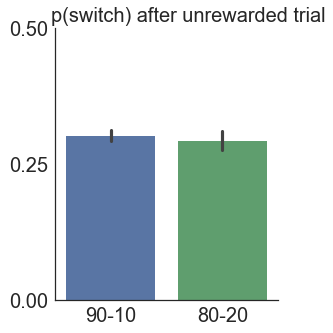

In [32]:
plt.figure(figsize=(4,5))
sns.barplot(x='Condition',y='Switch',data=datas[datas['1_Reward']==0],n_boot = 1000,ci=95)
plt.ylim(0,0.5)
plt.title('        p(switch) after unrewarded trial',fontsize=20)
plt.xticks(fontsize=fontsize)
plt.yticks([0,0.25,0.5],fontsize=fontsize)
plt.ylabel('fraction switch trials',fontsize=fontsize)
plt.xlabel('Condition',fontsize=15)
plt.ylabel('')
plt.xlabel('')
sns.despine()

['80-20' '90-10']


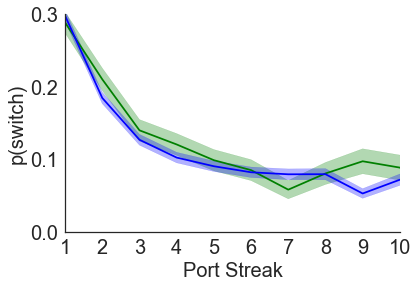

In [42]:
conditions = np.unique(datas['Condition'].values)
print(conditions)
colors = ['green','blue']

for j,condition in enumerate(conditions):
    data = datas[datas['Condition'] == condition].copy()
    port_streaks = np.unique(data['Port Streak'].values)
    p_switch = np.zeros((port_streaks.shape[0],2))

    for i,streak in enumerate(port_streaks):
            switches = data[data['Port Streak'] == streak]['Switch']
            p_switch[i,0] = switches.mean()
            p_switch[i,1] = switches.std() / np.sqrt(switches.shape[0])

    plt.plot(port_streaks,p_switch[:,0],color=colors[j])
    plt.fill_between(x=port_streaks,y1=p_switch[:,0]+p_switch[:,1],y2=p_switch[:,0]-p_switch[:,1],color=colors[j],alpha=0.3)
    plt.title('        p(switch) after unrewarded trial',fontsize=20)
    plt.xlabel('Port Streak',fontsize=fontsize)
    plt.ylabel('p(switch)',fontsize=fontsize)
    plt.xticks(fontsize=20)
    plt.yticks([0,0.1,0.2,0.3],fontsize=fontsize)
    plt.xlim(1,10)
    plt.ylim(0,0.3)
    
sns.despine()

['80-20' '90-10']


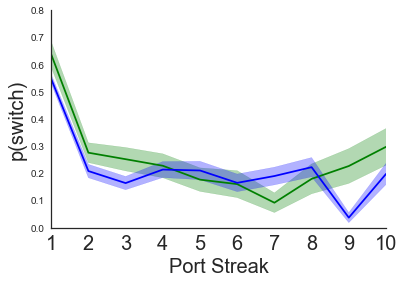

In [39]:
conditions = np.unique(datas['Condition'].values)
print(conditions)
colors = ['green','blue']

for j,condition in enumerate(conditions):
    data = datas[((datas['Condition'] == condition) & (datas['Reward Streak'] == -1))].copy()
    port_streaks = np.unique(data['Port Streak'].values)
    p_switch = np.zeros((port_streaks.shape[0],2))

    for i,streak in enumerate(port_streaks):
            switches = data[data['Port Streak'] == streak]['Switch']
            p_switch[i,0] = switches.mean()
            p_switch[i,1] = switches.std() / np.sqrt(switches.shape[0])

    plt.plot(port_streaks,p_switch[:,0],color=colors[j])
    plt.fill_between(x=port_streaks,y1=p_switch[:,0]+p_switch[:,1],y2=p_switch[:,0]-p_switch[:,1],color=colors[j],alpha=0.3)
    plt.xlabel('Port Streak',fontsize=fontsize)
    plt.ylabel('p(switch)',fontsize=fontsize)
    plt.xticks(fontsize=20)
    #plt.yticks([0,0.1,0.2,0.3],fontsize=fontsize)
    plt.xlim(1,10)
    plt.ylim(0,0.8)


sns.despine()

# Compare to win-stay lose-switch

['80-20' '90-10']


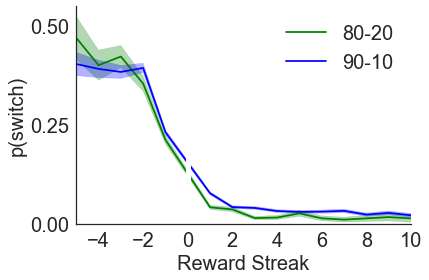

In [44]:
conditions = np.unique(datas['Condition'].values)
print(conditions)
colors = ['green','blue']

for j,condition in enumerate(conditions):
    data = datas[datas['Condition'] == condition].copy()
    reward_streaks = np.unique(data['Reward Streak'].values)
    p_switch = np.zeros((reward_streaks.shape[0],2))

    for i,streak in enumerate(reward_streaks):
            switches = data[data['Reward Streak'] == streak]['Switch']
            p_switch[i,0] = switches.mean()
            p_switch[i,1] = switches.std() / np.sqrt(switches.shape[0])

    plt.plot(reward_streaks,p_switch[:,0],color=colors[j],label=condition)
    plt.fill_between(x=reward_streaks,y1=p_switch[:,0]+p_switch[:,1],y2=p_switch[:,0]-p_switch[:,1],color=colors[j],alpha=0.3)
    plt.xlabel('Reward Streak',fontsize=fontsize)
    plt.ylabel('p(switch)',fontsize=fontsize)
    plt.yticks([0,0.25,0.5,0.75],fontsize=fontsize)
    plt.ylim(0,0.55)
    plt.xticks(fontsize=20)
    plt.xlim(-5,10)
    plt.legend(loc='best',fontsize=fontsize)
    #plt.yticks([0,0.1,0.2,0.3],fontsize=20)
    plt.vlines(x=0,ymin=0.01,ymax=0.5,color='white',linewidth=5,zorder=10)

    sns.despine()

In [46]:
boolean_2R = ((datas['1_Port']==1) & (datas['2_Port'] == 1) & (datas['1_Reward']==1) & (datas['2_Reward']==1))
boolean_2NR = ((datas['1_Port']==1) & (datas['2_Port'] == 1) & (datas['1_Reward']==0) & (datas['2_Reward']==0))

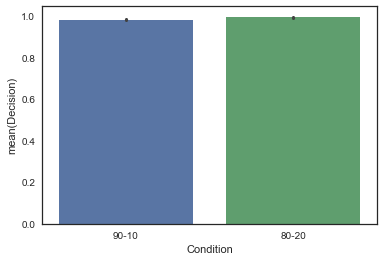

In [47]:
sns.barplot(x='Condition',y='Decision',data = datas[boolean_2R] )

(0, 1)

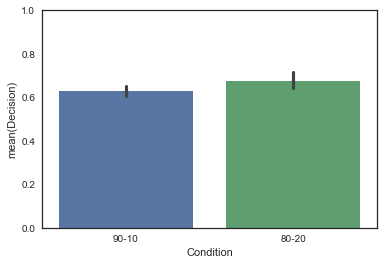

In [48]:
sns.barplot(x='Condition',y='Decision',data = datas[boolean_2NR] )
plt.ylim(0,1)

(0, 1)

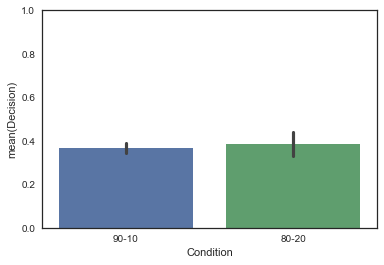

In [49]:
boolean_2NR_R = ((datas['1_Port']==0) & (datas['2_Port'] == 0) & (datas['1_Reward']==0) & (datas['2_Reward']==0))
sns.barplot(x='Condition',y='Decision',data = datas[boolean_2NR_R] )
plt.ylim(0,1)

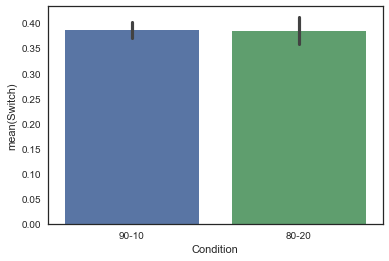

In [50]:
boolean_2NR_R = ((datas['1_Reward']==0) & (datas['2_Reward']==0))
sns.barplot(x='Condition',y='Switch',data = datas[boolean_2NR_R] )